In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Load the dataset 
Smart_Man_df=pd.read_csv("data.csv")
Smart_Man_df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,11-01-2016 17:00,60,-77.78778597,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,11-01-2016 17:30,50,40,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,11-01-2016 17:40,60,40,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [44]:
#Checking the overall info of the dataset
Smart_Man_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [49]:
# Convert numeric columns from object to float where applicable
numeric_columns = Smart_Man_df.columns.drop(['timestamp'])
Smart_numeric_df = Smart_Man_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [51]:
# Checking missing values
missing_values = Smart_numeric_df.isnull().sum().sort_values(ascending=False)
missing_values

zone1_temperature               949
zone2_temperature               923
equipment_energy_consumption    912
zone1_humidity                  888
zone9_humidity                  888
zone3_humidity                  878
zone2_humidity                  867
lighting_energy                 864
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
zone4_temperature               816
visibility_index                815
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

In [55]:
Target_data_missing=Smart_numeric_df[Smart_numeric_df['equipment_energy_consumption'].isnull()]
Target_data_missing['equipment_energy_consumption'].isnull().sum()

912

In [56]:
Smart_numeric_df['equipment_energy_consumption'].dtypes

dtype('float64')

In [59]:
Target_data_Not_missing=Smart_numeric_df[Smart_numeric_df['equipment_energy_consumption'].notnull()]
Target_data_Not_missing['equipment_energy_consumption']

0          60.000000
1          60.000000
2          50.000000
3          50.000000
4          60.000000
            ...     
16852    1139.985693
16853      50.000000
16854      50.000000
16855      80.000000
16856      30.000000
Name: equipment_energy_consumption, Length: 15945, dtype: float64

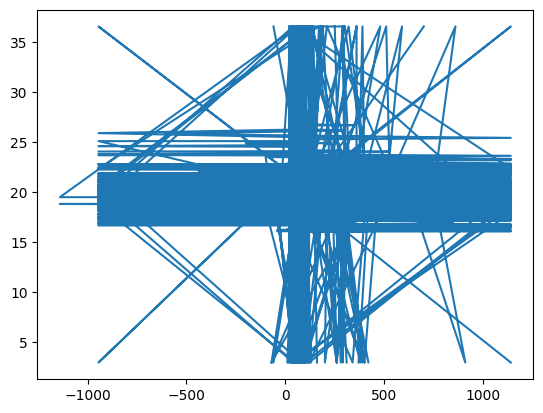

In [57]:
### Examine the graph of features with target variable
plt.plot(Smart_numeric_df['equipment_energy_consumption'],Smart_numeric_df['zone2_temperature'])

In [71]:
X_train=Target_data_Not_missing[['zone2_temperature']]
y_train=Target_data_Not_missing['equipment_energy_consumption']

# 4. Train XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Predict missing equipment_energy_consumption values
X_missing = Target_data_missing[['zone2_temperature']]  # <- FIXED
predicted_salaries = xgb_model.predict(X_missing)

# 6. Fill in the missing values
Smart_numeric_df.loc[Smart_numeric_df['equipment_energy_consumption'].isnull(), 'equipment_energy_consumption'] = predicted_salaries

# ✅ Final dataset with imputed values
print(Smart_numeric_df['equipment_energy_consumption'])

ValueError: setting an array element with a sequence.

In [72]:
print(type(predicted_salaries))

<class 'numpy.ndarray'>


In [73]:
predicted_salaries.shape

(912,)